In [24]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import xarray as xr
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
import matplotlib.colors as colors
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point
from global_land_mask import globe

In [25]:
def load_pi_means(var_name):
    f2 = xr.open_dataset('DATA/piControl/piControl_only_%s_1.nc'%(var_name),decode_times=False)
    ave2 = f2['ave']
    return ave2

In [26]:
def get_sign(expt_name,v):
    modellist= pd.read_csv('DATA/%s/%s_%s_djf_change_models.csv'%(expt_name,expt_name,v),skipinitialspace=True,header=0)['0']
    filename='DATA/%s/%s_%s_djf_1.nc'%(expt_name,expt_name,v)
    sign = xr.open_dataset(filename,decode_times=False)['sign']
    per = int(len(modellist)*2/3)
    plotsign = sign.where(sign<per)
    plotsign1 =plotsign*0
    return plotsign1


In [27]:
#Fig1: Comparison between PI and obs

In [28]:
fobs = xr.open_dataset('DATA/C20.nc',decode_times=False)
tas_obs = fobs['tas_spatialmean_djf']
pr_obs = fobs['pr_spatialmean_djf']
psl_obs = fobs['psl_spatialmean_djf']
nao_obs = fobs['nao_pattern_djf']
nao_pr_obs = fobs['nao_pr_regression_djf']
nao_ts_obs = fobs['nao_tas_regression_djf']

In [45]:
nao_pi_djftas = load_pi_means('tas_spatialmean_djf')
nao_pi_djfpr = load_pi_means('pr_spatialmean_djf')
nao_pi_djfpsl = load_pi_means('psl_spatialmean_djf')

nao_pi = load_pi_means('nao_pattern_djf')
nao_pr_pi = load_pi_means('nao_pr_regression_djf')

nao_ts_pi = load_pi_means('nao_tas_regression_djf')
#nao_sst_pi = load_files_means('sst_regression_djf')

In [30]:
#land sea mask
lat=np.arange(-89.5, 90., 1.0)
lon=np.arange(-179.5, 180, 1.0)

    # Make a grid
lon_grid, lat_grid = np.meshgrid(lon,lat)

    # Get whether the points are on land.
z = globe.is_land(lat_grid, lon_grid)
lmask = nao_obs*0
lmask.values = z

In [31]:
def plot_means_nao(ax11,var,cmap1,bounds1,title,label):
    norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
    ax11.set_title('(%s)'%title,loc='left',fontsize=25,pad=10)
    ax11.coastlines()
    ax11.gridlines()
    gl11 = ax11.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.3, linestyle='--')
    gl11.xlabels_top = False
    gl11.ylabels_left = False
    gl11.ylocator = mticker.FixedLocator([20,  50, 80])
    gl11.xlocator = mticker.FixedLocator([-80,-40,0,40])
    gl11.xformatter = LONGITUDE_FORMATTER
    gl11.yformatter = LATITUDE_FORMATTER
    ax11.set_xlim([-91,41])
    ax11.set_ylim([19,81])
    fig11=ax11.contourf(var.lon,var.lat,var,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
    cax11,kw11 = matplotlib.colorbar.make_axes(ax11,location='bottom',pad=0.11,shrink=0.95,fraction=0.05)
    cb11=plt.colorbar(fig11, cax=cax11, **kw11,extend='both')
    cb11.ax.tick_params(labelsize=12)
    cb11label=label
    cb11.set_label(cb11label,fontsize=20)
    return fig11

In [32]:
def plot_means_nao1(ax11,var,cmap1,bounds1,title,label):
    norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
    ax11.set_title('(%s)'%title,loc='left',fontsize=25,pad=10)
    ax11.coastlines()
    ax11.gridlines()
    gl11 = ax11.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.3, linestyle='--')
    gl11.xlabels_top = False
    gl11.ylabels_left = False
    gl11.ylocator = mticker.FixedLocator([20,  50, 80])
    gl11.xlocator = mticker.FixedLocator([-80,-40,0,40])
    gl11.xformatter = LONGITUDE_FORMATTER
    gl11.yformatter = LATITUDE_FORMATTER
    ax11.set_xlim([-91,41])
    ax11.set_ylim([19,81])
    var1=var.where(lmask==0)
    fig11=ax11.contourf(var.lon,var.lat,var1,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
    cax11,kw11 = matplotlib.colorbar.make_axes(ax11,location='bottom',pad=0.11,shrink=0.95,fraction=0.05)
    cb11=plt.colorbar(fig11, cax=cax11, **kw11,extend='both')
    cb11.ax.tick_params(labelsize=12)
    cb11label=label
    cb11.set_label(cb11label,fontsize=20)
    return fig11

In [33]:
cmap1=plt.get_cmap('turbo')
cmap2=plt.get_cmap('BuGn')
cmap3=plt.get_cmap('Blues')#('Spectral_r')
cmap4=plt.get_cmap('PuOr')
cmap5=plt.get_cmap('bwr')
cmap6=plt.get_cmap('BrBG')



bounds1 = np.arange(-45,46,9)
bounds2 = np.arange(0,11,1)
bounds3 = np.arange(900,1051,15)
bounds4 = np.arange(-5,5.1,1)
bounds5 = np.arange(-2.5,2.51,0.5)
bounds6 = np.arange(-1.5,1.51,0.3)

/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility inst

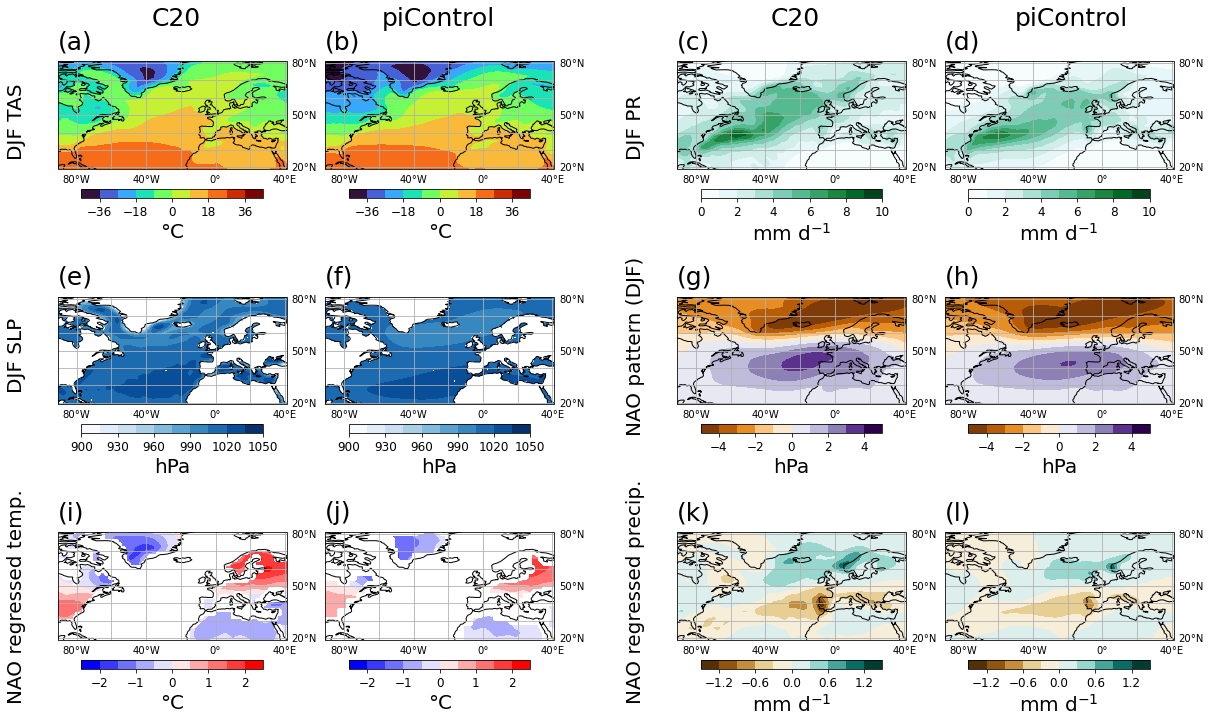

In [46]:
fig = plt.figure(figsize=(20,12))
gs = gridspec.GridSpec(5, 5, height_ratios=[1,0.05,1,0.05,1],width_ratios=[5,5,1,5,5]) 

ax00 = plt.subplot(gs[0],projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax10 = plt.subplot(gs[3],projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax01 = plt.subplot(gs[1],projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax11 = plt.subplot(gs[4],projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

ax20 = plt.subplot(gs[10],projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax30 = plt.subplot(gs[13],projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax21 = plt.subplot(gs[11],projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax31 = plt.subplot(gs[14],projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

ax40 = plt.subplot(gs[20],projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax50 = plt.subplot(gs[23],projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax41 = plt.subplot(gs[21],projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax51 = plt.subplot(gs[24],projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))


fig.text(0.09,0.72,'DJF TAS',fontsize = 20,rotation = 90)
fig.text(0.09,0.45,'DJF SLP',fontsize = 20,rotation = 90)
fig.text(0.09,0.09,'NAO regressed temp.',fontsize = 20,rotation = 90)
fig.text(0.52,0.72,'DJF PR',fontsize = 20,rotation = 90)
fig.text(0.52,0.40,'NAO pattern (DJF)',fontsize = 20,rotation = 90)
fig.text(0.52,0.09,'NAO regressed precip.',fontsize = 20,rotation = 90)

fig.text(0.19,0.87,'C20',fontsize = 25)
fig.text(0.35,0.87,'piControl',fontsize = 25)
fig.text(0.62,0.87,'C20',fontsize = 25)
fig.text(0.79,0.87,'piControl',fontsize = 25)

plot_means_nao(ax00,tas_obs,cmap1,bounds1,'a','%sC'%chr(176))
plot_means_nao(ax01,nao_pi_djftas,cmap1,bounds1,'b','%sC'%chr(176))

plot_means_nao(ax10,pr_obs,cmap2,bounds2,'c','mm d$^{-1}$')
plot_means_nao(ax11,nao_pi_djfpr,cmap2,bounds2,'d','mm d$^{-1}$')

plot_means_nao1(ax20,psl_obs,cmap3,bounds3,'e','hPa')
plot_means_nao1(ax21,nao_pi_djfpsl,cmap3,bounds3,'f','hPa')

plot_means_nao(ax30,nao_obs,cmap4,bounds4,'g','hPa')
plot_means_nao(ax31,nao_pi,cmap4,bounds4,'h','hPa')

plot_means_nao(ax40,nao_ts_obs,cmap5,bounds5,'i','%sC'%chr(176))
plot_means_nao(ax41,nao_ts_pi,cmap5,bounds5,'j','%sC'%chr(176))

plot_means_nao(ax50,nao_pr_obs,cmap6,bounds6,'k','mm d$^{-1}$')
plot_means_nao(ax51,nao_pr_pi,cmap6,bounds6,'l','mm d$^{-1}$')




In [ ]:
# Fig 2: Change in mean state

In [49]:
def load_data(expt_name):
    f1 = xr.open_dataset('DATA/%s/%s_tas_spatialmean_djf_1.nc'%(expt_name,expt_name),decode_times=False)
    tas = f1['ave']
    f2 = xr.open_dataset('DATA/%s/%s_pr_spatialmean_djf_1.nc'%(expt_name,expt_name),decode_times=False)
    pr = f2['ave']
    f3 = xr.open_dataset('DATA/%s/%s_psl_spatialmean_djf_1.nc'%(expt_name,expt_name),decode_times=False)
    psl = f3['ave']
    return tas,pr,psl

In [50]:
tmh,pmh,lmh = load_data('midHolocene-cal-adj')
tlig,plig,llig = load_data('lig127k-cal-adj')
tlgm,plgm,llgm = load_data('lgm-cal-adj')
taco2,paco2,laco2 = load_data('abrupt4xCO2')


In [51]:
tsignaco2 = get_sign('abrupt4xCO2','tas_spatialmean')
tsignmh = get_sign('midHolocene-cal-adj','tas_spatialmean')
tsignlig = get_sign('lig127k-cal-adj','tas_spatialmean')
tsignlgm = get_sign('lgm-cal-adj','tas_spatialmean')
psignaco2 = get_sign('abrupt4xCO2','pr_spatialmean')
psignmh = get_sign('midHolocene-cal-adj','pr_spatialmean')
psignlig = get_sign('lig127k-cal-adj','pr_spatialmean')
psignlgm = get_sign('lgm-cal-adj','pr_spatialmean')
lsignaco2 = get_sign('abrupt4xCO2','psl_spatialmean')
lsignmh = get_sign('midHolocene-cal-adj','psl_spatialmean')
lsignlig = get_sign('lig127k-cal-adj','psl_spatialmean')
lsignlgm = get_sign('lgm-cal-adj','psl_spatialmean')

In [52]:
cmap1=plt.get_cmap('bwr')
cmap2=plt.get_cmap('BrBG')
cmap3=plt.get_cmap('RdBu_r')#('PuOr_r')
projection=ccrs.PlateCarree(central_longitude=0.0, globe=None)
bounds1 = [-40,-25,-15,-5,-3,-2,-1,-0.5,-0.1,0,0.1,0.5,1,2,3,5,15,25,40]
bounds2 = [-3,-2,-1,-0.8,-0.6,-0.4,-0.2,-0.1,-0.05,0,0.05,0.1,0.2,0.4,0.6,0.8,1,2,3]
bounds3 = [-35,-25,-15,-5,-3,-2,-1,-0.5,-0.1,0,0.1,0.5,1,2,3,5,15,25,35]
#bounds1 = [-35,-25,-15,-5,-3,-2,-1,-0.5,-0.1,0,0.1,0.5,1,2,3,5,15,25,35]
#bounds2 = [-3,-2,-1,-0.6,-0.4,-0.2,-0.1,-0.05,0,0.05,0.1,0.2,0.4,0.6,1,2,3]
#bounds3 = [-35,-25,-15,-5,-3,-2,-1,-0.5,-0.1,0,0.1,0.5,1,2,3,5,15,25,35]


In [53]:
def plot_means_nao(ax11,nam_1p_ave,cmap1,bounds1,sign,title):
    norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
    ax11.set_title('(%s)'%title,loc='left',fontsize=15,pad=5)
    ax11.coastlines()
    ax11.gridlines()
    gl11 = ax11.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.3, linestyle='--')
    gl11.xlabels_top = False
    gl11.ylabels_left = False
    gl11.ylocator = mticker.FixedLocator([20,  50, 80])
    gl11.xlocator = mticker.FixedLocator([-80,-40,0,40])
    gl11.xformatter = LONGITUDE_FORMATTER
    gl11.yformatter = LATITUDE_FORMATTER
    ax11.set_xlim([-91,41])
    ax11.set_ylim([19,81])
    fig11=ax11.contourf(nam_1p_ave.lon,nam_1p_ave.lat,nam_1p_ave,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
    ax11.contourf(sign.lon,sign.lat,sign,hatches=['...'],alpha=0,transform=ccrs.PlateCarree())
    return fig11

/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/matplotlib/contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/matplotlib/contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


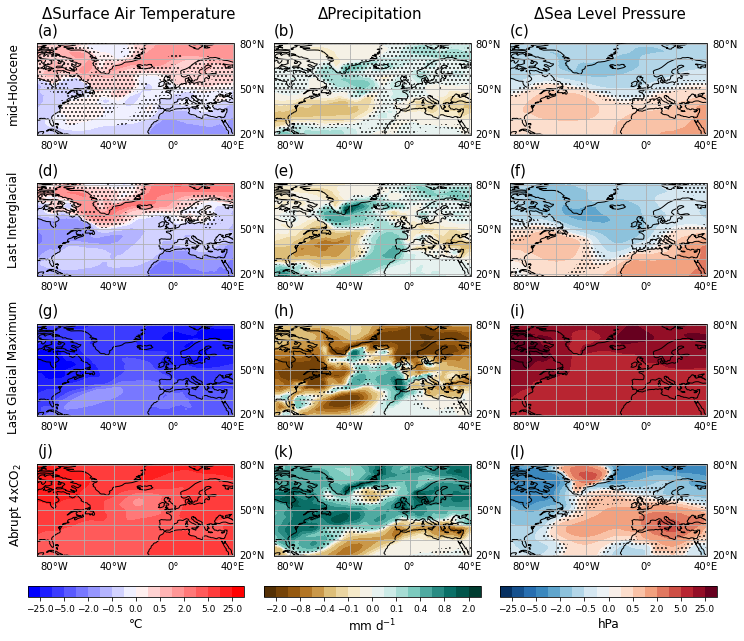

In [54]:

fig, axs = plt.subplots(nrows=4,ncols=3,figsize=(12,11),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0.0, globe=None)})
ax00 = axs[0][0]
ax01 = axs[0][1]
ax02 = axs[0][2]
ax10 = axs[1][0]
ax11 = axs[1][1]
ax12 = axs[1][2]
ax20 = axs[2][0]
ax21 = axs[2][1]
ax22 = axs[2][2]
ax30 = axs[3][0]
ax31 = axs[3][1]
ax32 = axs[3][2]

fig.text(0.09,0.75,'mid-Holocene',fontsize = 12,rotation = 90)
fig.text(0.09,0.57,'Last Interglacial',fontsize = 12,rotation = 90)
fig.text(0.09,0.36,'Last Glacial Maximum',fontsize = 12,rotation = 90)
fig.text(0.09,0.22,'Abrupt 4xCO$_{2}$',fontsize = 12,rotation = 90)
fig.text(0.13,0.88,'%sSurface Air Temperature'%chr(916),fontsize = 15)
fig.text(0.45,0.88,'%sPrecipitation'%chr(916),fontsize = 15)
fig.text(0.7,0.88,'%sSea Level Pressure'%chr(916),fontsize = 15)
figa1=plot_means_nao(ax00,tmh,cmap1,bounds1,tsignmh,'a')
plot_means_nao(ax10,tlig,cmap1,bounds1,tsignlig,'d')
plot_means_nao(ax20,tlgm,cmap1,bounds1,tsignlgm,'g')
plot_means_nao(ax30,taco2,cmap1,bounds1,tsignaco2,'j')
figa2=plot_means_nao(ax01,pmh,cmap2,bounds2,psignmh,'b')
plot_means_nao(ax11,plig,cmap2,bounds2,psignlig,'e')
plot_means_nao(ax21,plgm,cmap2,bounds2,psignlgm,'h')
plot_means_nao(ax31,paco2,cmap2,bounds2,psignaco2,'k')
figa3=plot_means_nao(ax02,lmh,cmap3,bounds3,lsignmh,'c')
plot_means_nao(ax12,llig,cmap3,bounds3,lsignlig,'f')
plot_means_nao(ax22,llgm,cmap3,bounds3,lsignlgm,'i')
plot_means_nao(ax32,laco2,cmap3,bounds3,lsignaco2,'l')

cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in [ax00,ax10,ax20,ax30]],location='bottom',pad=0.05,shrink=1.1,fraction=0.05)
cb1=plt.colorbar(figa1, cax=cax1, **kw1,extend='both')
cb1.ax.tick_params(labelsize=9)
cax2,kw2 = matplotlib.colorbar.make_axes([ax for ax in [ax01,ax11,ax21,ax31]],location='bottom',pad=0.05,shrink=1.1,fraction=0.05)
cb2=plt.colorbar(figa2, cax=cax2, **kw2,extend='both')
cb2.ax.tick_params(labelsize=9)
cax3,kw3 = matplotlib.colorbar.make_axes([ax for ax in [ax02,ax12,ax22,ax32]],location='bottom',pad=0.05,shrink=1.1,fraction=0.05)
cb3=plt.colorbar(figa3, cax=cax3, **kw3,extend='both')
cb3.ax.tick_params(labelsize=9)
cb1label='%sC'%chr(176)
cb2label='mm d$^{-1}$'
cb3label='hPa'
cb1.set_label(cb1label,fontsize=12)
cb2.set_label(cb2label,fontsize=12)
cb3.set_label(cb3label,fontsize=12)




In [ ]:
#Fig 3: NAO pattern

In [55]:
nao_pi = load_pi_means('nao_pattern_djf')


In [56]:
naosignaco2 = get_sign('abrupt4xCO2','nao_pattern')
naosignmh = get_sign('midHolocene-cal-adj','nao_pattern')
naosignlig = get_sign('lig127k-cal-adj','nao_pattern')
naosignlgm = get_sign('lgm-cal-adj','nao_pattern')

In [58]:
def load_data(expt_name):
    f1 = xr.open_dataset('DATA/%s/%s_only_nao_pattern_djf_1.nc'%(expt_name,expt_name),decode_times=False)
    ave = f1['ave']
    std = f1['std']
    return ave,std

aveaco2,stdaco2 = load_data('abrupt4xCO2')
avemh,stdmh = load_data('midHolocene-cal-adj')
avelig,stdlig = load_data('lig127k-cal-adj')
avelgm,stdlgm = load_data('lgm-cal-adj')

In [59]:
def plot_means_nao(ax11,ax12,ave,std,sign,title1,title2):
    cmap1 = plt.get_cmap('PuOr')
    bounds1=[-5,-4,-3,-2,-1,-0.5,0,0.5,1,2,3,4,5]
    norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
    cmap2 = plt.get_cmap('Reds')
    bounds2=[0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2.0,10]
    #[0,0.05,0.1,0.15,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2.0,10]
    norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)
    ax11.set_title('(%s)'%title1,loc='left',fontsize=15,pad=1)
    ax11.coastlines()
    ax11.gridlines()
    gl11 = ax11.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.3, linestyle='--')
    gl11.xlabels_top = False
    gl11.ylabels_left = False
    gl11.ylocator = mticker.FixedLocator([20, 50, 80])
    gl11.xlocator = mticker.FixedLocator([-80,-40,0,40])
    gl11.xformatter = LONGITUDE_FORMATTER
    gl11.yformatter = LATITUDE_FORMATTER
    ax11.set_xlim([-91,41])
    ax11.set_ylim([19,81])
    fig11=ax11.contourf(ave.lon,ave.lat,ave,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
    ax11.contourf(sign.lon,sign.lat,sign,hatches=['...'],alpha=0,transform=ccrs.PlateCarree())
    CS=ax11.contour(nao_pi.lon,nao_pi.lat,nao_pi,levels=np.arange(-5,5.1,1), colors='red', linestyles='-',linewidths=1)
    ax11.clabel(CS, fontsize=10)
    
    ax12.set_title('(%s)'%title2,loc='left',fontsize=15,pad=1)
    ax12.coastlines()
    ax12.gridlines()
    gl12 = ax12.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.3, linestyle='--')
    gl12.xlabels_top = False
    gl12.ylabels_left = False
    gl12.ylocator = mticker.FixedLocator([20, 50, 80])
    gl12.xlocator = mticker.FixedLocator([-80,-40,0,40])
    gl12.xformatter = LONGITUDE_FORMATTER
    gl12.yformatter = LATITUDE_FORMATTER
    ax12.set_xlim([-91,41])
    ax12.set_ylim([19,81])
    fig12=ax12.contourf(std.lon,std.lat,std,levels=bounds2, transform=ccrs.PlateCarree(),cmap=cmap2,norm=norm2)
    return fig11,fig12

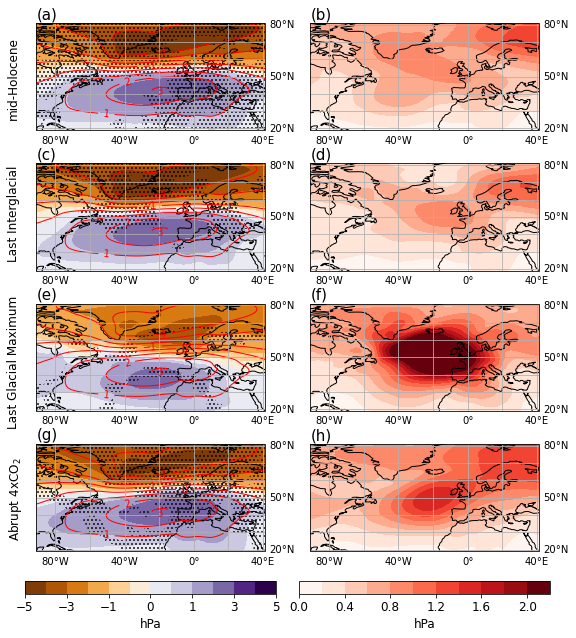

In [60]:
fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(9,11),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0.0, globe=None)})
ax00 = axs[0][0]
ax01 = axs[0][1]

ax10 = axs[1][0]
ax11 = axs[1][1]

ax20 = axs[2][0]
ax21 = axs[2][1]

ax30 = axs[3][0]
ax31 = axs[3][1]


fig.text(0.08,0.75,'mid-Holocene',fontsize = 12,rotation = 90)
fig.text(0.08,0.57,'Last Interglacial',fontsize = 12,rotation = 90)
fig.text(0.08,0.36,'Last Glacial Maximum',fontsize = 12,rotation = 90)
fig.text(0.08,0.22,'Abrupt 4xCO$_{2}$',fontsize = 12,rotation = 90)

figa1,figa2=plot_means_nao(ax00,ax01,avemh,stdmh,naosignmh,'a','b')
plot_means_nao(ax10,ax11,avelig,stdlig,naosignlig,'c','d')
plot_means_nao(ax20,ax21,avelgm,stdlgm,naosignlgm,'e','f')
plot_means_nao(ax30,ax31,aveaco2,stdaco2,naosignaco2,'g','h')


cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in [ax00,ax10,ax20,ax30]],location='bottom',pad=0.05,shrink=1.1,fraction=0.05)
cb1=plt.colorbar(figa1, cax=cax1, **kw1,extend='both')
cb1.ax.tick_params(labelsize=12)
cax2,kw2 = matplotlib.colorbar.make_axes([ax for ax in [ax01,ax11,ax21,ax31]],location='bottom',pad=0.05,shrink=1.1,fraction=0.05)
cb2=plt.colorbar(figa2, cax=cax2, **kw2,extend='both')
cb2.ax.tick_params(labelsize=12)


cb1label='hPa'
cb2label='hPa'

cb1.set_label(cb1label,fontsize=12)
cb2.set_label(cb2label,fontsize=12)



In [ ]:
#Fig 6: change in regressed tas

In [61]:
nao_tas_pi = load_pi_means('nao_tas_regression_djf')

In [62]:
naotassignaco2 = get_sign('abrupt4xCO2','nao_tas_regression')
naotassignmh = get_sign('midHolocene-cal-adj','nao_tas_regression')
naotassignlig = get_sign('lig127k-cal-adj','nao_tas_regression')
naotassignlgm = get_sign('lgm-cal-adj','nao_tas_regression')

In [64]:
def load_data(expt_name):
    f1 = xr.open_dataset('DATA/%s/%s_nao_tas_regression_djf_1.nc'%(expt_name,expt_name),decode_times=False)
    ave = f1['ave']
    std = f1['std']
    return ave,std

aveaco2tas,stdaco2tas = load_data('abrupt4xCO2')
avemhtas,stdmhtas = load_data('midHolocene-cal-adj')
aveligtas,stdligtas = load_data('lig127k-cal-adj')
avelgmtas,stdlgmtas = load_data('lgm-cal-adj')

In [65]:
lat=np.arange(-89.5, 90., 1.0)
lon=np.arange(-179.5, 180, 1.0)

    # Make a grid
lon_grid, lat_grid = np.meshgrid(lon,lat)

    # Get whether the points are on land.
z = globe.is_land(lat_grid, lon_grid)
lmask = nao_obs*0
lmask.values = z

In [66]:
def plot_means_nao(ax11,ax12,ave,std,sign,title1,title2):
    cmap1=plt.get_cmap('bwr')
    bounds1 =[-1.5,-1,-0.8,-0.6,-0.4,-0.2,-0.1,-0.06,-0.03,0,0.03,0.06,0.1,0.2,0.4,0.6,0.8,1.0,1.5]#[-2,-1,-0.5,-0.3,-0.1,0,0.1,0.3,0.5,1,2]
    norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
    cmap2 = plt.get_cmap('Reds')
    bounds2=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6]
    #[0,0.05,0.1,0.15,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2.0,10]
    norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)
    ax11.set_title('(%s)'%title1,loc='left',fontsize=15,pad=1)
    ax11.coastlines()
    ax11.gridlines()
    gl11 = ax11.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.3, linestyle='--')
    gl11.xlabels_top = False
    gl11.ylabels_left = False
    gl11.ylocator = mticker.FixedLocator([20, 50, 80])
    gl11.xlocator = mticker.FixedLocator([-80,-40,0,40])
    gl11.xformatter = LONGITUDE_FORMATTER
    gl11.yformatter = LATITUDE_FORMATTER
    ax11.set_xlim([-91,41])
    ax11.set_ylim([19,81])
    
    fig11=ax11.contourf(ave.lon,ave.lat,ave,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
    ax11.contourf(sign.lon,sign.lat,sign.where(lmask==1),hatches=['...'],alpha=0,transform=ccrs.PlateCarree())
    CS=ax11.contour(nao_tas_pi.lon,nao_tas_pi.lat,nao_tas_pi,levels=np.arange(-1.5,1.51,0.3), colors='k', linestyles='-',linewidths=1)
    ax11.clabel(CS, fontsize=10)
    
    ax12.set_title('(%s)'%title2,loc='left',fontsize=15,pad=1)
    ax12.coastlines()
    ax12.gridlines()
    gl12 = ax12.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.3, linestyle='--')
    gl12.xlabels_top = False
    gl12.ylabels_left = False
    gl12.ylocator = mticker.FixedLocator([20, 50, 80])
    gl12.xlocator = mticker.FixedLocator([-80,-40,0,40])
    gl12.xformatter = LONGITUDE_FORMATTER
    gl12.yformatter = LATITUDE_FORMATTER
    ax12.set_xlim([-91,41])
    ax12.set_ylim([19,81])
    fig12=ax12.contourf(std.lon,std.lat,std,levels=bounds2, transform=ccrs.PlateCarree(),cmap=cmap2,norm=norm2)
    return fig11,fig12

/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility inst

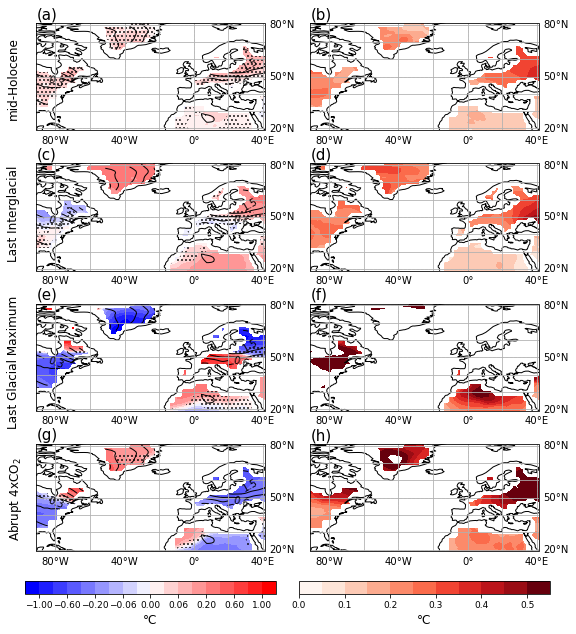

In [67]:
fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(9,11),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0.0, globe=None)})
ax00 = axs[0][0]
ax01 = axs[0][1]

ax10 = axs[1][0]
ax11 = axs[1][1]

ax20 = axs[2][0]
ax21 = axs[2][1]

ax30 = axs[3][0]
ax31 = axs[3][1]


fig.text(0.08,0.75,'mid-Holocene',fontsize = 12,rotation = 90)
fig.text(0.08,0.57,'Last Interglacial',fontsize = 12,rotation = 90)
fig.text(0.08,0.36,'Last Glacial Maximum',fontsize = 12,rotation = 90)
fig.text(0.08,0.22,'Abrupt 4xCO$_{2}$',fontsize = 12,rotation = 90)

figa1,figa2=plot_means_nao(ax00,ax01,avemhtas,stdmhtas,naotassignmh,'a','b')
plot_means_nao(ax10,ax11,aveligtas,stdligtas,naotassignlig,'c','d')
plot_means_nao(ax20,ax21,avelgmtas,stdlgmtas,naotassignlgm,'e','f')
plot_means_nao(ax30,ax31,aveaco2tas,stdaco2tas,naotassignaco2,'g','h')


cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in [ax00,ax10,ax20,ax30]],location='bottom',pad=0.05,shrink=1.1,fraction=0.05)
cb1=plt.colorbar(figa1, cax=cax1, **kw1,extend='both')
cb1.ax.tick_params(labelsize=9)
cax2,kw2 = matplotlib.colorbar.make_axes([ax for ax in [ax01,ax11,ax21,ax31]],location='bottom',pad=0.05,shrink=1.1,fraction=0.05)
cb2=plt.colorbar(figa2, cax=cax2, **kw2,extend='both')
cb2.ax.tick_params(labelsize=9)


cb1label='%sC'%chr(176)
cb2label='%sC'%chr(176)

cb1.set_label(cb1label,fontsize=12)
cb2.set_label(cb2label,fontsize=12)



In [86]:
#Fig 7: change in regressed pr

In [68]:
nao_pr_pi = load_pi_means('nao_pr_regression_djf')

In [69]:
naoprsignaco2 = get_sign('abrupt4xCO2','nao_pr_regression')
naoprsignmh = get_sign('midHolocene-cal-adj','nao_pr_regression')
naoprsignlig = get_sign('lig127k-cal-adj','nao_pr_regression')
naoprsignlgm = get_sign('lgm-cal-adj','nao_pr_regression')

In [70]:
def load_data(expt_name):
    f1 = xr.open_dataset('DATA/%s/%s_nao_pr_regression_djf_1.nc'%(expt_name,expt_name),decode_times=False)
    ave = f1['ave']
    std = f1['std']
    return ave,std

aveaco2pr,stdaco2pr = load_data('abrupt4xCO2')
avemhpr,stdmhpr = load_data('midHolocene-cal-adj')
aveligpr,stdligpr = load_data('lig127k-cal-adj')
avelgmpr,stdlgmpr = load_data('lgm-cal-adj')

In [71]:
def plot_means_nao(ax11,ax12,ave,std,sign,title1,title2):
    cmap1=plt.get_cmap('BrBG')
    #bounds1 = np.arange(-0.2,0.21,0.02)
    bounds1 =[-7,-0.6,-0.4,-0.2,-0.1,-0.08,-0.06,-0.04,-0.02,0,0.02,0.04,0.06,0.08,0.1,0.2,0.4,0.6,0.7]
    norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
    cmap2 = plt.get_cmap('Greens')
    bounds2=[0,0.02,0.04,0.06,0.08,0.1,0.15,0.2,0.25,0.3,0.35,1.0]
    norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)
    ax11.set_title('(%s)'%title1,loc='left',fontsize=15,pad=1)
    ax11.coastlines()
    ax11.gridlines()
    gl11 = ax11.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.3, linestyle='--')
    gl11.xlabels_top = False
    gl11.ylabels_left = False
    gl11.ylocator = mticker.FixedLocator([20, 50, 80])
    gl11.xlocator = mticker.FixedLocator([-80,-40,0,40])
    gl11.xformatter = LONGITUDE_FORMATTER
    gl11.yformatter = LATITUDE_FORMATTER
    ax11.set_xlim([-91,41])
    ax11.set_ylim([19,81])
    fig11=ax11.contourf(ave.lon,ave.lat,ave,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
    ax11.contourf(sign.lon,sign.lat,sign,hatches=['...'],alpha=0,transform=ccrs.PlateCarree())
    CS=ax11.contour(nao_pr_pi.lon,nao_pr_pi.lat,nao_pr_pi,levels=np.arange(-1,1.01,0.2), colors='k', linestyles='-',linewidths=1)
    ax11.clabel(CS, fontsize=10)
    
    ax12.set_title('(%s)'%title2,loc='left',fontsize=15,pad=1)
    ax12.coastlines()
    ax12.gridlines()
    gl12 = ax12.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.3, linestyle='--')
    gl12.xlabels_top = False
    gl12.ylabels_left = False
    gl12.ylocator = mticker.FixedLocator([20, 50, 80])
    gl12.xlocator = mticker.FixedLocator([-80,-40,0,40])
    gl12.xformatter = LONGITUDE_FORMATTER
    gl12.yformatter = LATITUDE_FORMATTER
    ax12.set_xlim([-91,41])
    ax12.set_ylim([19,81])
    fig12=ax12.contourf(std.lon,std.lat,std,levels=bounds2, transform=ccrs.PlateCarree(),cmap=cmap2,norm=norm2)
    return fig11,fig12

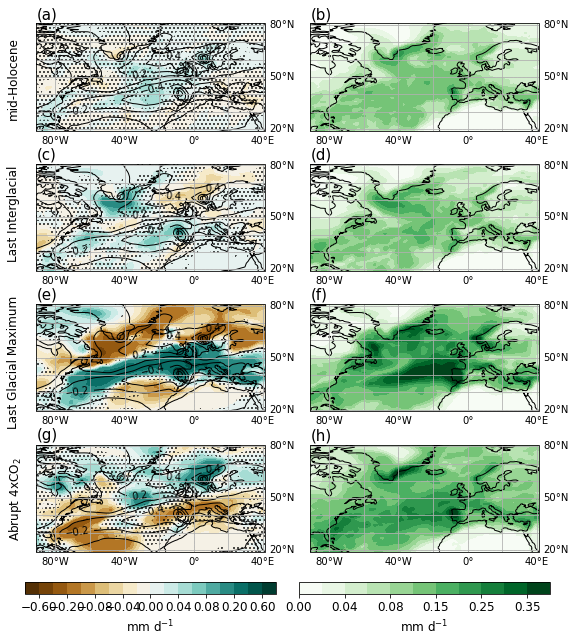

In [72]:
fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(9,11),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0.0, globe=None)})
ax00 = axs[0][0]
ax01 = axs[0][1]

ax10 = axs[1][0]
ax11 = axs[1][1]

ax20 = axs[2][0]
ax21 = axs[2][1]

ax30 = axs[3][0]
ax31 = axs[3][1]


fig.text(0.08,0.75,'mid-Holocene',fontsize = 12,rotation = 90)
fig.text(0.08,0.57,'Last Interglacial',fontsize = 12,rotation = 90)
fig.text(0.08,0.36,'Last Glacial Maximum',fontsize = 12,rotation = 90)
fig.text(0.08,0.22,'Abrupt 4xCO$_{2}$',fontsize = 12,rotation = 90)

figa1,figa2=plot_means_nao(ax00,ax01,avemhpr,stdmhpr,naoprsignmh,'a','b')
plot_means_nao(ax10,ax11,aveligpr,stdligpr,naoprsignlig,'c','d')
plot_means_nao(ax20,ax21,avelgmpr,stdlgmpr,naoprsignlgm,'e','f')
plot_means_nao(ax30,ax31,aveaco2pr,stdaco2pr,naoprsignaco2,'g','h')


cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in [ax00,ax10,ax20,ax30]],location='bottom',pad=0.05,shrink=1.1,fraction=0.05)
cb1=plt.colorbar(figa1, cax=cax1, **kw1,extend='both')
cb1.ax.tick_params(labelsize=12)
cax2,kw2 = matplotlib.colorbar.make_axes([ax for ax in [ax01,ax11,ax21,ax31]],location='bottom',pad=0.05,shrink=1.1,fraction=0.05)
cb2=plt.colorbar(figa2, cax=cax2, **kw2,extend='both')
cb2.ax.tick_params(labelsize=12)


cb1label='mm d$^{-1}$'
cb2label='mm d$^{-1}$'

cb1.set_label(cb1label,fontsize=12)
cb2.set_label(cb2label,fontsize=12)


